In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import sympy as sy
import scipy.constants as pc
from sympy import *

In [2]:
# Funktionen
def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([])
    for i in range (werte.size):
        zMax = (np.abs(sy.diff(f, variablen[i])) * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        zMaxArray = np.append(zMaxArray, x)
    return variablen[np.argmax(zMaxArray)]

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]+(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))

def print_to_table(avgs, stds, rows, cols,
                   highlight_best=True,
                   max_is_best=True,
                   avg_format='{0:!>4.1f}',
                   std_format='{1:!<4.1f}',
                   file=None,
                   col_orientation='c'):
    # Find best values
    best_avg = {}
    if highlight_best:
        if max_is_best:
            for c in cols:
                idx = np.argmax(avgs[c], axis=0)
                best_avg[c] = idx
        else:
            for c in cols:
                idx = np.argmin(avgs[c], axis=0)
                best_avg[c] = idx

    # Header
    print_str = '\\begin{tabular}{l' + (" "+col_orientation) * len(cols) + '} \hline\n'
    for c in cols:
        print_str += ' & ' + c
    print_str += ' \\\\ \n \hline'

    # Content
    for m in range(len(rows)):
        row_name = rows[m]
        print_str += '\n{0}'.format(row_name)
        for c in cols:
            print_str += ' &\n '
            print_list = [avgs[c][m]]
            print_list += [stds[c][m]]
            if m == best_avg.get(c, None):
                print_str += ('$\mathbf{{'+ avg_format + ' \\pm ' + std_format + '}}$').format(*print_list)
            else:
                print_str += ('$'+ avg_format + ' \\pm ' + std_format + '$').format(*print_list)

        print_str += "\n \\vspace*{0.0mm} \\\\"
        print_str = print_str.replace('!', '\\phantom{0}')

    # Footer
    print_str += '\n \hline \n \end{tabular}'

    # Write output
    if file is None:
        print(print_str)
    else:
        with open(file, 'w') as f:
            f.write(print_str)

In [3]:
# Erinnerungen
# x = np.array([,])
# x.size
# x, y = symbols('x y')
# expr = x*y
# expr.subs([(x, wert_x), (y, wert_y)])

In [4]:
# s(m)
m = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
              550, 600, 650, 700, 750, 800, 850, 900]) #0.1g
mess = np.array([0.44, 0.81, 1.22, 1.61, 2.02, 2.43, 2.79, 3.13, 3.60, 3.97, 
                 4.39, 4.74, 5.15, 5.52, 5.87, 6.36, 6.76, 7.11]) # 0.1
alu = np.array([0.19, 0.40, 0.57, 0.80, 0.96, 1.18, 1.39, 1.59, 1.77, 2.0, 
                2.16, 2.45, 2.58, 2.77, 2.97, 3.15, 3.38, 3.56]) # 0.1
stahl = np.array([0.07, 0.13, 0.19, 0.27, 0.32, 0.39, 0.44, 0.50, 0.57, 0.63, 
                  0.69, 0.75, 0.81, 0.89, 0.95, 1.02, 1.08, 1.14]) #0.1

# Verschiedene d
m_short = 450 # 0.1g
d = np.array([75.1, 71.3, 67.1, 63.2, 59.3, 54.7, 50.3, 46.7, 43.3, 37.1, 33.3]) # 0.1
s = np.array([0.89, 0.76, 0.65, 0.54, 0.45, 0.34, 0.29, 0.22, 0.20, 0.12, 0.07]) #0.1

# Fläche-Biege
a_r = np.array([10.25, 10.15, 10.15, 10.10, 12.20, 10.15, 10.10, 12.10, 10.95, 10.15])
i_r = np.array([8.05, 7.0, 5.85, 4.0, 10.0, 0, 0, 0, 6.9, 6.8])
s_f = np.array([1.24, 0.94, 0.78, 0.77, 0.65, 0.69, 0.79, 0.34, 0.97, 0.76])
flaeche = pc.pi*(a_r**2-i_r**2)
biege = pc.pi*(a_r**4-i_r**4)

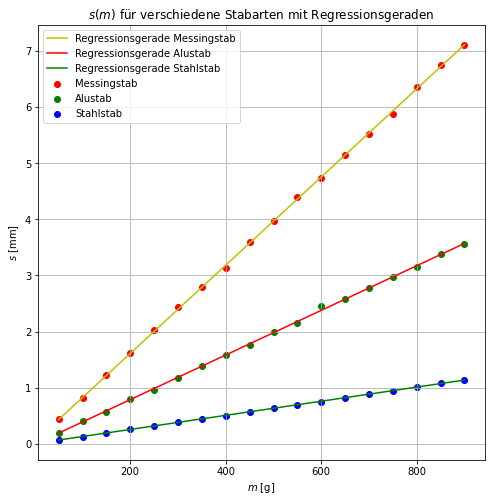

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(m, mess, color='r', label='Messingstab')
ax.scatter(m, alu, color='g', label='Alustab')
ax.scatter(m, stahl, color='b', label='Stahlstab')

x = np.linspace(50, 900, 18)
b_mess, a_mess = bestB(m, mess), bestA(m, mess)
b_alu, a_alu = bestB(m, alu), bestA(m, alu)
b_stahl, a_stahl = bestB(m, stahl), bestA(m, stahl)

ax.plot(x, x*b_mess+ a_mess, color='y', label='Regressionsgerade Messingstab')
ax.plot(x, x*b_alu+ a_alu, color='r', label='Regressionsgerade Alustab')
ax.plot(x, x*b_stahl+ a_stahl, color='g', label='Regressionsgerade Stahlstab')

ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'$s(m)$ für verschiedene Stabarten mit Regressionsgeraden')
ax.legend()
ax.grid()

fig.savefig("s(m).png")

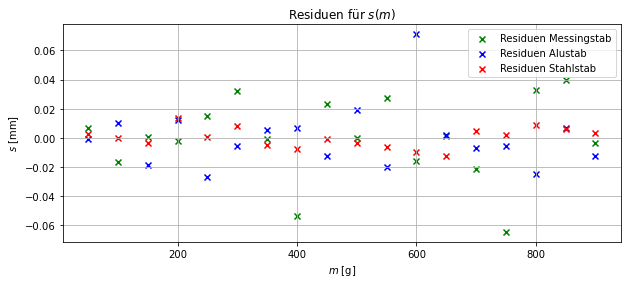

In [6]:
fig, ax = plt.subplots(figsize=(10,4))

res_mess = (mess- (x*b_mess + a_mess))
res_alu = (alu- (x*b_alu + a_alu))
res_stahl = (stahl- (x*b_stahl + a_stahl))

ax.scatter(x, res_mess, color='g', marker='x', label='Residuen Messingstab')
ax.scatter(x, res_alu, color='b', marker='x',label='Residuen Alustab')
ax.scatter(x, res_stahl, color='r', marker='x',label='Residuen Stahlstab')

ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'Residuen für $s(m)$')
ax.legend()
ax.grid()

fig.savefig("s(m)_residuen.png")

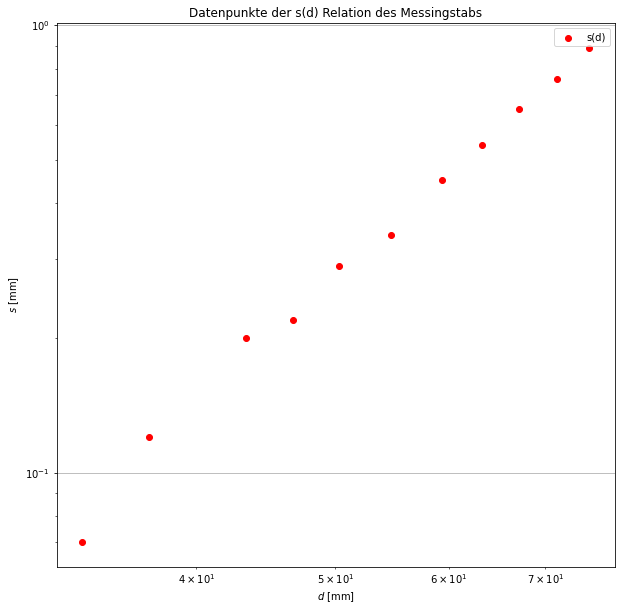

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xscale('log')
ax.set_yscale('log')

ax.scatter(d, s, color='r', label='s(d)')

a_d, b_d = bestA(d, s), bestB(d, s)

#ax.plot(d, d*b_d + a_d, color='b', label='Regressionsgerade s(d)')

ax.set(xlabel=r'$d$ [mm]', ylabel=r'$s$ [mm]', title='Datenpunkte der s(d) Relation des Messingstabs')
ax.legend()
ax.grid()

fig.savefig("s(d).png")